# Figures 4 and S6: sensitivity test over each high EKE region

* **Fig. 4. Sensitivity test over the Kuroshio Extension and the Gulf Stream.** EKE trends computed over (A) the Kuroshio Extension (KE) and (C) the Gulf Stream (GS) for different periods. Trends are computed from the original area-weighted mean EKE time series shown in Fig. S5. Significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics. Maps showing the two-sat EKE trends over (B) the Kuroshio Extension and (D) the Gulf Stream for the last 30, 20 and 10 years. Oblique gray lines show non-statistically significant trends (p < 0.05).


* **Fig. S6. Sensitivity test over each high EKE region.** Sensitivity test of the EKE trends computed over each high EKE region for different periods (Kuroshio Extension and Gulf Stream are shown in Fig. 4). Trends are computed from the original area-weighted mean EKE time series shown in Fig. S5. Significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics. (A) Great Whirl and Socotra Eddy in East Africa (GWSE), (B) Agulhas Current (AC), (C) Loop Current (LC), (D) Brazil Malvinas Confluence region (BMC), and (E) East Australian Current (EAC). 

### Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import pymannkendall as mk
from matplotlib.patches import Patch
import cartopy.feature as feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import ListedColormap

### Function to calculate trends

In [2]:
def mk_test(ts):
    
    if np.isnan(ts).all():
        return np.nan, np.nan
    results = mk.yue_wang_modification_test(ts)
    slope, p_value = results.slope, results.p
    return slope, p_value

### Open files with the time series of each region

In [3]:
kinds = ['ALL_SAT', 'TWO_SAT']

# exclude this data from the datasets to keep only each high EKE regions
keys_excluded    = ['no ice', 'high eke', 'tropical', 'remainder']

timeseries = {}
for kind in kinds:
    path_ts = f'../../results/EKE_{kind}/tseries/EKE_{kind}_tseries.nc'
    ds = xr.open_dataset(path_ts)
    timeseries[kind] = ds.drop_vars(keys_excluded)

### Regions of study

In [4]:
dic_keys = list(timeseries['ALL_SAT'].data_vars.keys())
dic_keys

['GWSE', 'AC', 'KE', 'GS', 'LC', 'BMC', 'EAC']

## Calculate trends over different periods of the EKE time series - sensitivity test over each high EKE region

In [5]:
# Multply by the factor 365 days to convert trends per day to trends per year 
# units from (cm$^2$ s$^{-2}$ day$^{-1}$) to (cm$^2$ s$^{-2}$ y$^{-1}$)
factor = 365

# Years for the test
test_years = np.arange(1993, 2013+1)#)2000, 2015+1)

In [6]:
dic_slope_all = {}
dic_slope_two = {}

dic_pval_all = {}
dic_pval_two = {}

for k in range(len(dic_keys)):
            
    # --------- COMPUTE TRENDS ---------
            
    print('')
    print('----------------')
    print(dic_keys[k])
    print('----------------')
    
    list_slope_all = []
    list_slope_two = []
    list_pval_all  = []
    list_pval_two  = []
    
    for year in test_years:

        # Initial date from which to calculate trends:
        cut_initial_date = str(year) + '-01-01' 
            
        # all-sat raw
        all_ts = timeseries['ALL_SAT'][dic_keys[k]].sel(time=slice(cut_initial_date, None))

        # two-sat raw
        two_ts = timeseries['TWO_SAT'][dic_keys[k]].sel(time=slice(cut_initial_date, None))
       
        # MK test
        slope_allraw,  p_value_allraw  = mk_test(all_ts)
        slope_tworaw,  p_value_tworaw  = mk_test(two_ts)
            
        # Save values into a list    
        list_slope_all.append(slope_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
        list_slope_two.append(slope_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
        
        list_pval_all.append(p_value_allraw) 
        list_pval_two.append(p_value_tworaw)           
                      
    
    # Save lists into a dictionary

    dic_slope_all[dic_keys[k]] = list_slope_all
    dic_slope_two[dic_keys[k]] = list_slope_two
    
    dic_pval_all[dic_keys[k]] = list_pval_all
    dic_pval_two[dic_keys[k]] = list_pval_two



----------------
GWSE
----------------

----------------
AC
----------------

----------------
KE
----------------

----------------
GS
----------------

----------------
LC
----------------

----------------
BMC
----------------

----------------
EAC
----------------


## Figure parameters and functions

In [7]:
text_size  = 12
wdth       = 0.8

Add also trend with text 

In [8]:
def add_text_bars(ax, test_years, list_slope_highEKE_all, text_style_highEKE_all, text_color, offset, tsize):
    
    for i, num in enumerate(list_slope_highEKE_all):
        
        if num >= 0:
            ax.text(test_years[i], 
                num + offset, 
                f'{num:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color=text_color,
                style=text_style_highEKE_all[i],
                weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
            
        elif num < 0:
            if region == 'GWSE':
                offsetneg = 0.6
                
            elif region == 'BMC':
                offsetneg = 0.5  

            elif region == 'EAC':
                offsetneg = 0.6 
                
            else:
                offsetneg = 0.4
            
            ax.text(test_years[i], 
                num - offsetneg,  
                f'{num:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color=text_color,
                style=text_style_highEKE_all[i],
                weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
                 

In [9]:
def add_text_bars_EAC(ax, test_years, list_slope_highEKE_all, text_style_highEKE_all, text_color_all,
                                      list_slope_highEKE_two, text_style_highEKE_two, text_color_two):
    
    for i, trend_all in enumerate(list_slope_highEKE_all):
        
        trend_two = list_slope_highEKE_two[i]
        
        # all-sat >= two-sat
        
        if np.abs(trend_all) >= np.abs(trend_two):
            
            # -------- two-sat text --------
            
            if trend_two >= 0:
                
                offsetpos = 0.5
            
                ax.text(test_years[i], 
                    trend_two - offsetpos, 
                    f'{trend_two:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color='lightblue',
                    style=text_style_highEKE_two[i],
                    weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')
        
            elif trend_two < 0: 
            
                offsetneg = 0.2
                
                if np.abs(trend_two) < 0.01: # for the second last column
                
                    ax.text(test_years[i], 
                        trend_two + offsetneg,  
                        f'{trend_two:.2f}', 
                        fontsize=7,  
                        ha='center', va='bottom', color='cornflowerblue',
                        style=text_style_highEKE_two[i],
                        weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')

                else:
                
                    ax.text(test_years[i], 
                        trend_two + offsetneg,  
                        f'{trend_two:.2f}', 
                        fontsize=7,  
                        ha='center', va='bottom', color='lightblue',
                        style=text_style_highEKE_two[i],
                        weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')    
                    
            # -------- all-sat text --------
            
            if trend_all >= 0:
                
                offsetpos = 0.03
                
                ax.text(test_years[i], 
                    trend_all + offsetpos, 
                    f'{trend_all:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color=text_color_all,
                    style=text_style_highEKE_all[i],
                    weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
            
            elif trend_all < 0:

                offsetneg = 0.6 
            
                ax.text(test_years[i], 
                    trend_all - offsetneg,  
                    f'{trend_all:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color=text_color_all,
                    style=text_style_highEKE_all[i],
                    weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
                        
        # all-sat < two-sat
        
        elif np.abs(trend_all) < np.abs(trend_two):
            
            # -------- two-sat text --------
            
            if trend_two >= 0:
                
                offsetpos = 0.03
            
                ax.text(test_years[i], 
                    trend_two + offsetpos, 
                    f'{trend_two:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color=text_color_two,
                    style=text_style_highEKE_two[i],
                    weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')
        
            elif trend_two < 0: 
            
                offsetneg = 0.6 
            
                ax.text(test_years[i], 
                    trend_two - offsetneg,  
                    f'{trend_two:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color=text_color_two,
                    style=text_style_highEKE_two[i],
                    weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')    
                    
            # -------- all-sat text --------
            
            if trend_all >= 0:
                
                offsetpos = 0.5
                
                ax.text(test_years[i], 
                    trend_all - offsetpos, 
                    f'{trend_all:.2f}', 
                    fontsize=7,  
                    ha='center', va='bottom', color='pink',
                    style=text_style_highEKE_all[i],
                    weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
            
            elif trend_all < 0:
                
                if np.abs(trend_all) < 0.35:  # for the 3rd last column
                    offsetneg = 0.6 
            
                    ax.text(test_years[i], 
                        trend_all - offsetneg,  
                        f'{trend_all:.2f}', 
                        fontsize=7,  
                        ha='center', va='bottom', color=text_color_all,
                        style=text_style_highEKE_all[i],
                        weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')
                    
                else: 
                    offsetneg = 0.2 
            
                    ax.text(test_years[i], 
                        trend_all + offsetneg,  
                        f'{trend_all:.2f}', 
                        fontsize=7,  
                        ha='center', va='bottom', color='pink',
                        style=text_style_highEKE_all[i],
                        weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')                    

In [10]:
def add_text_bars_KE(ax, test_years, list_slope_highEKE_all, text_style_highEKE_all, text_color_all,
                                     list_slope_highEKE_two, text_style_highEKE_two, text_color_two, tsize):


    
    for i, trend_all in enumerate(list_slope_highEKE_all):
        
        trend_two = list_slope_highEKE_two[i]
        
        if trend_all >= trend_two:
            
            offsetall = 0.5
            offsettwo = 3.0
            
            # all-sat text
            ax.text(test_years[i], 
                trend_all + offsetall, 
                f'{trend_all:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color=text_color_all,
                style=text_style_highEKE_all[i],
                weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')

            # two-sat text
            ax.text(test_years[i], 
                trend_two - offsettwo, 
                f'{trend_two:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color='lightblue',
                style=text_style_highEKE_two[i],
                weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')            
        
        elif trend_all < trend_two:
            
            offsetall = 3.0
            offsettwo = 0.5
            
            # all-sat text
            ax.text(test_years[i], 
                trend_all - offsetall, 
                f'{trend_all:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color='pink', #'lavenderblush',
                style=text_style_highEKE_all[i],
                weight='bold' if text_style_highEKE_all[i] == 'normal' else 'normal')

            # two-sat text
            ax.text(test_years[i], 
                trend_two + offsettwo, 
                f'{trend_two:.2f}', 
                fontsize=tsize,  
                ha='center', va='bottom', color=text_color_two,
                style=text_style_highEKE_two[i],
                weight='bold' if text_style_highEKE_two[i] == 'normal' else 'normal')  

## FIGURE S6: Figures with the sensitivity test for each region (except KE and GS)

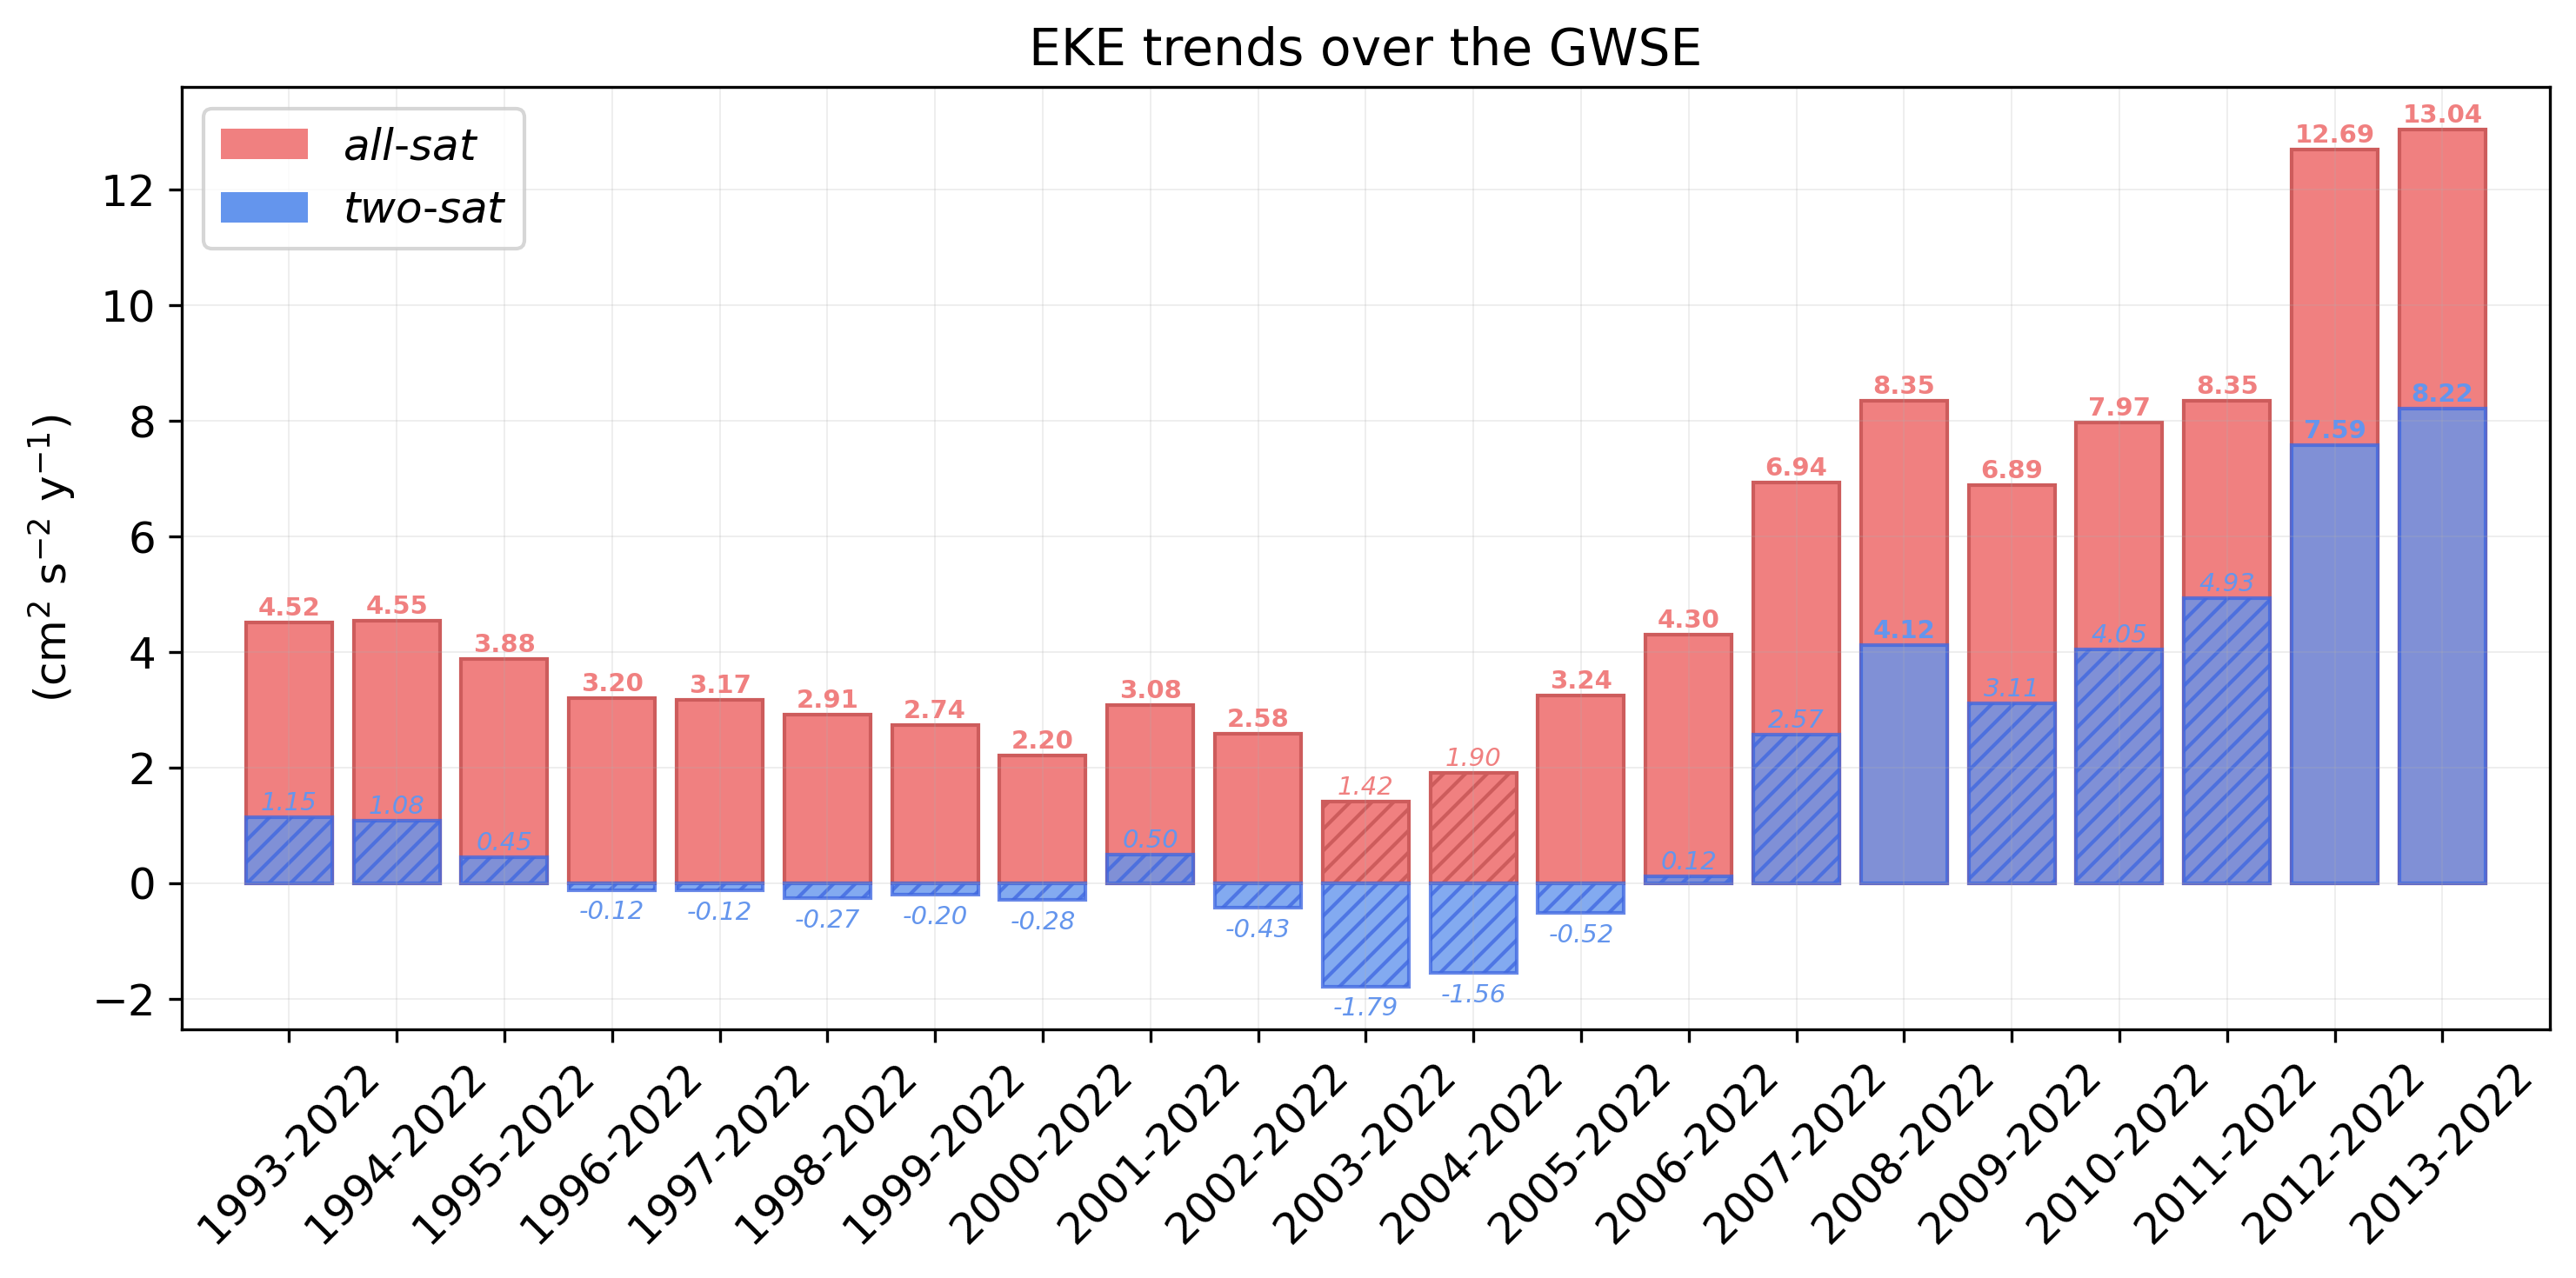

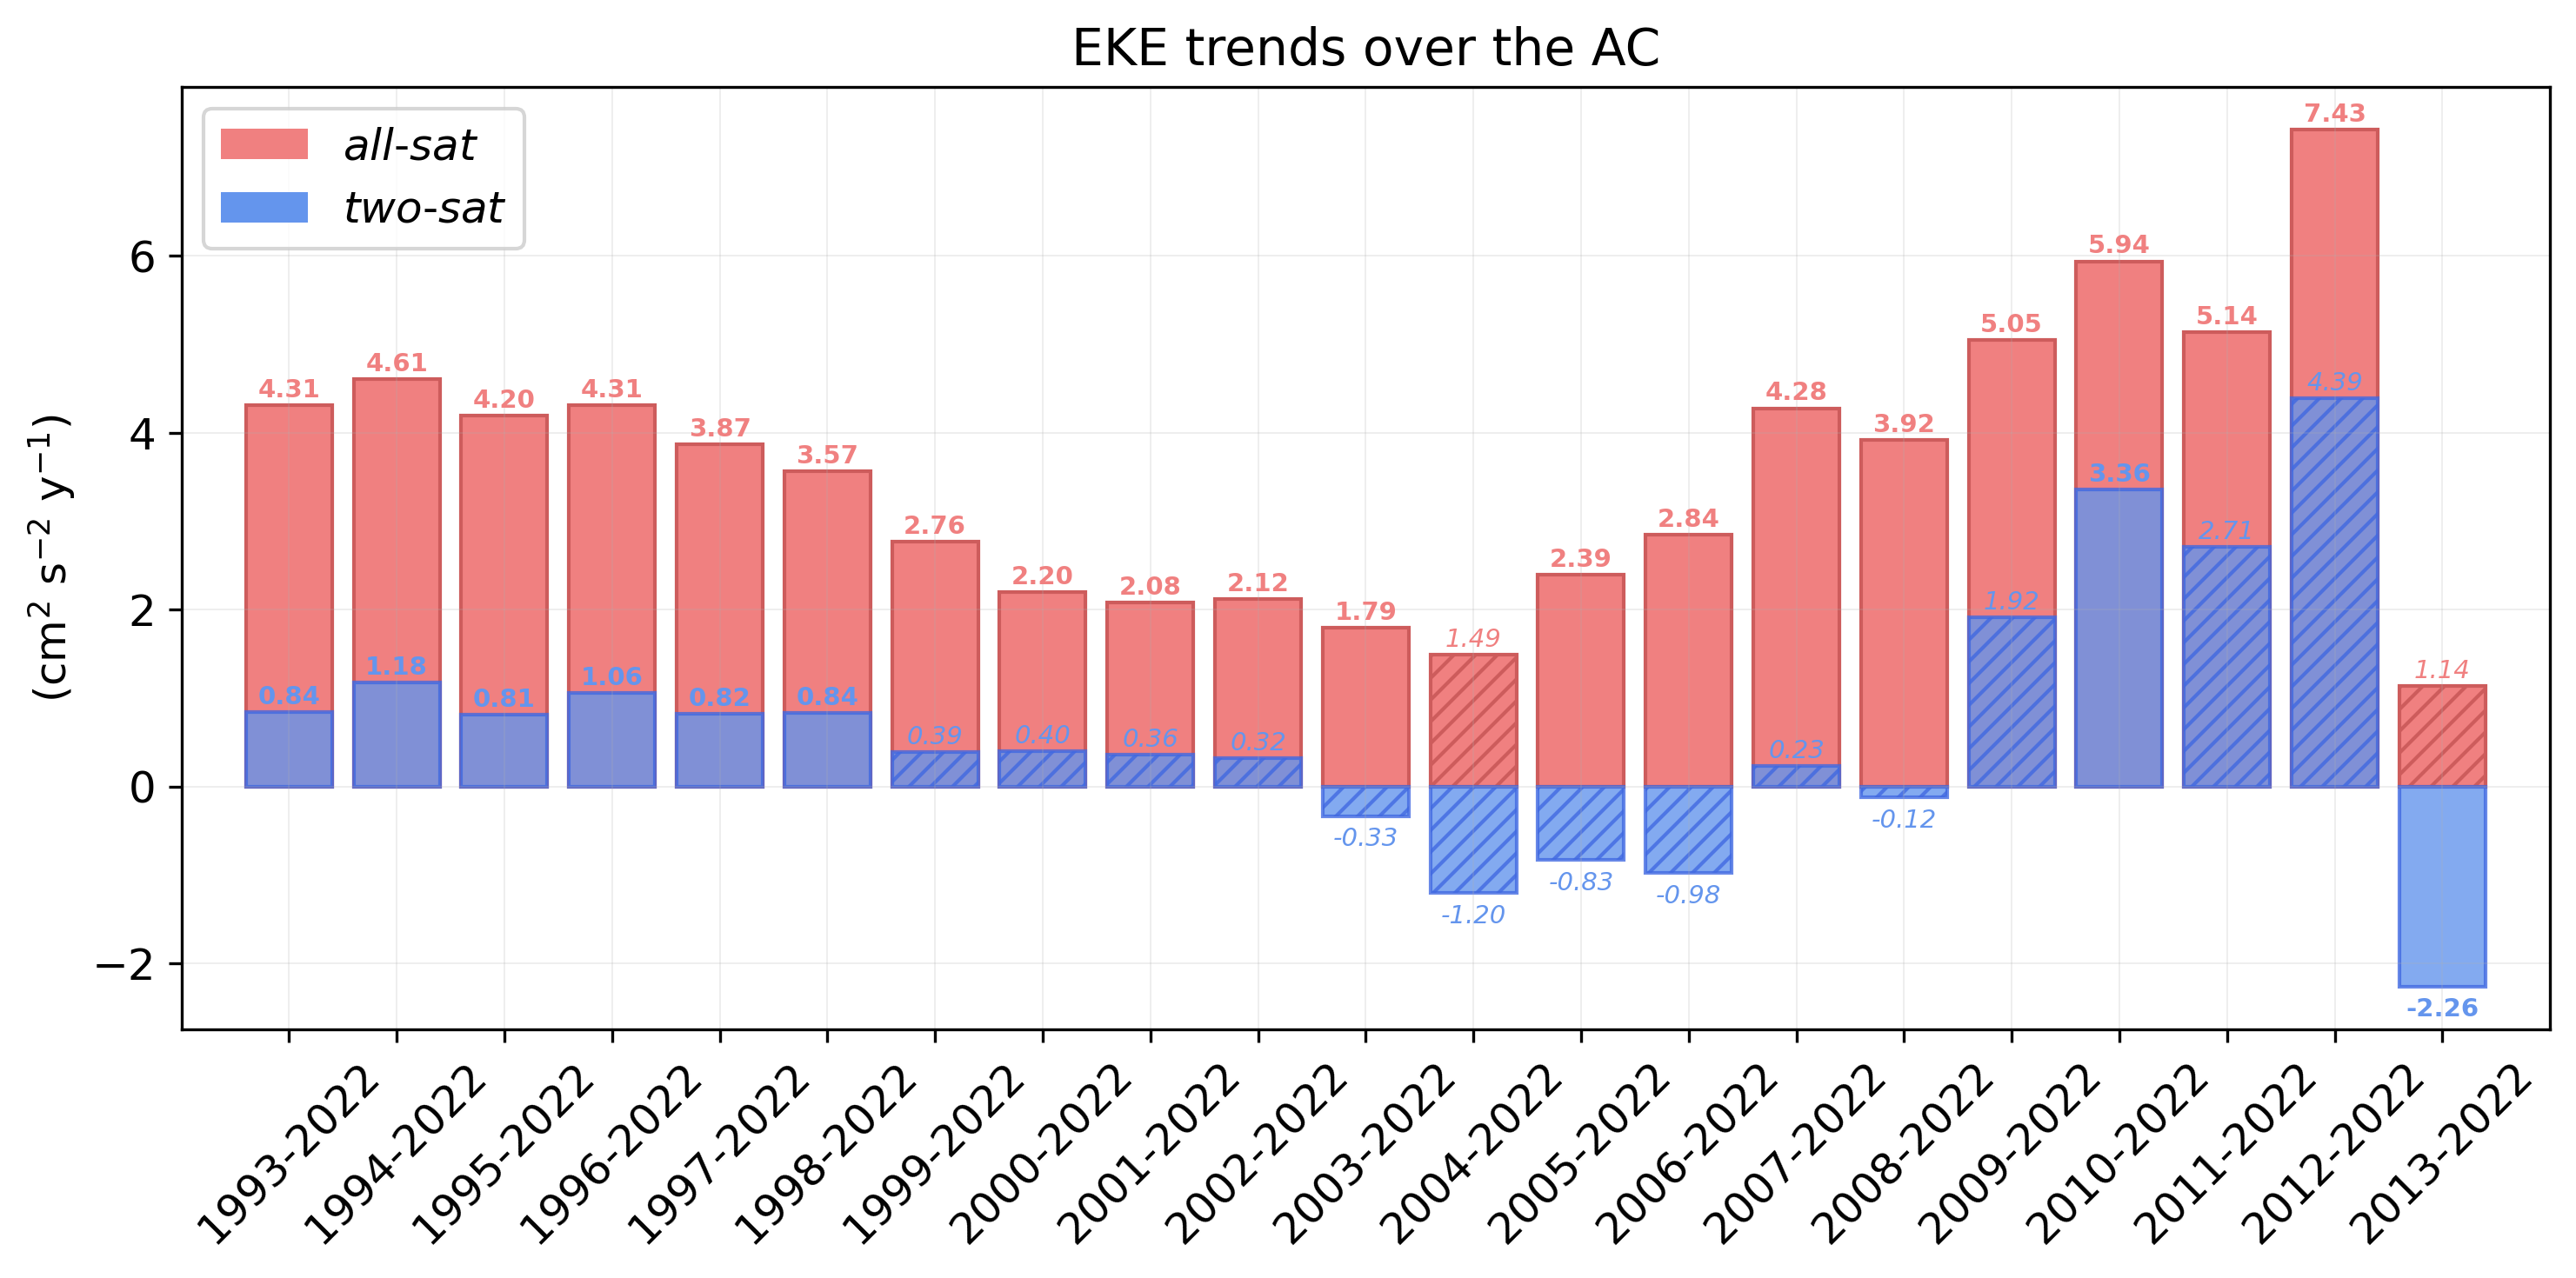

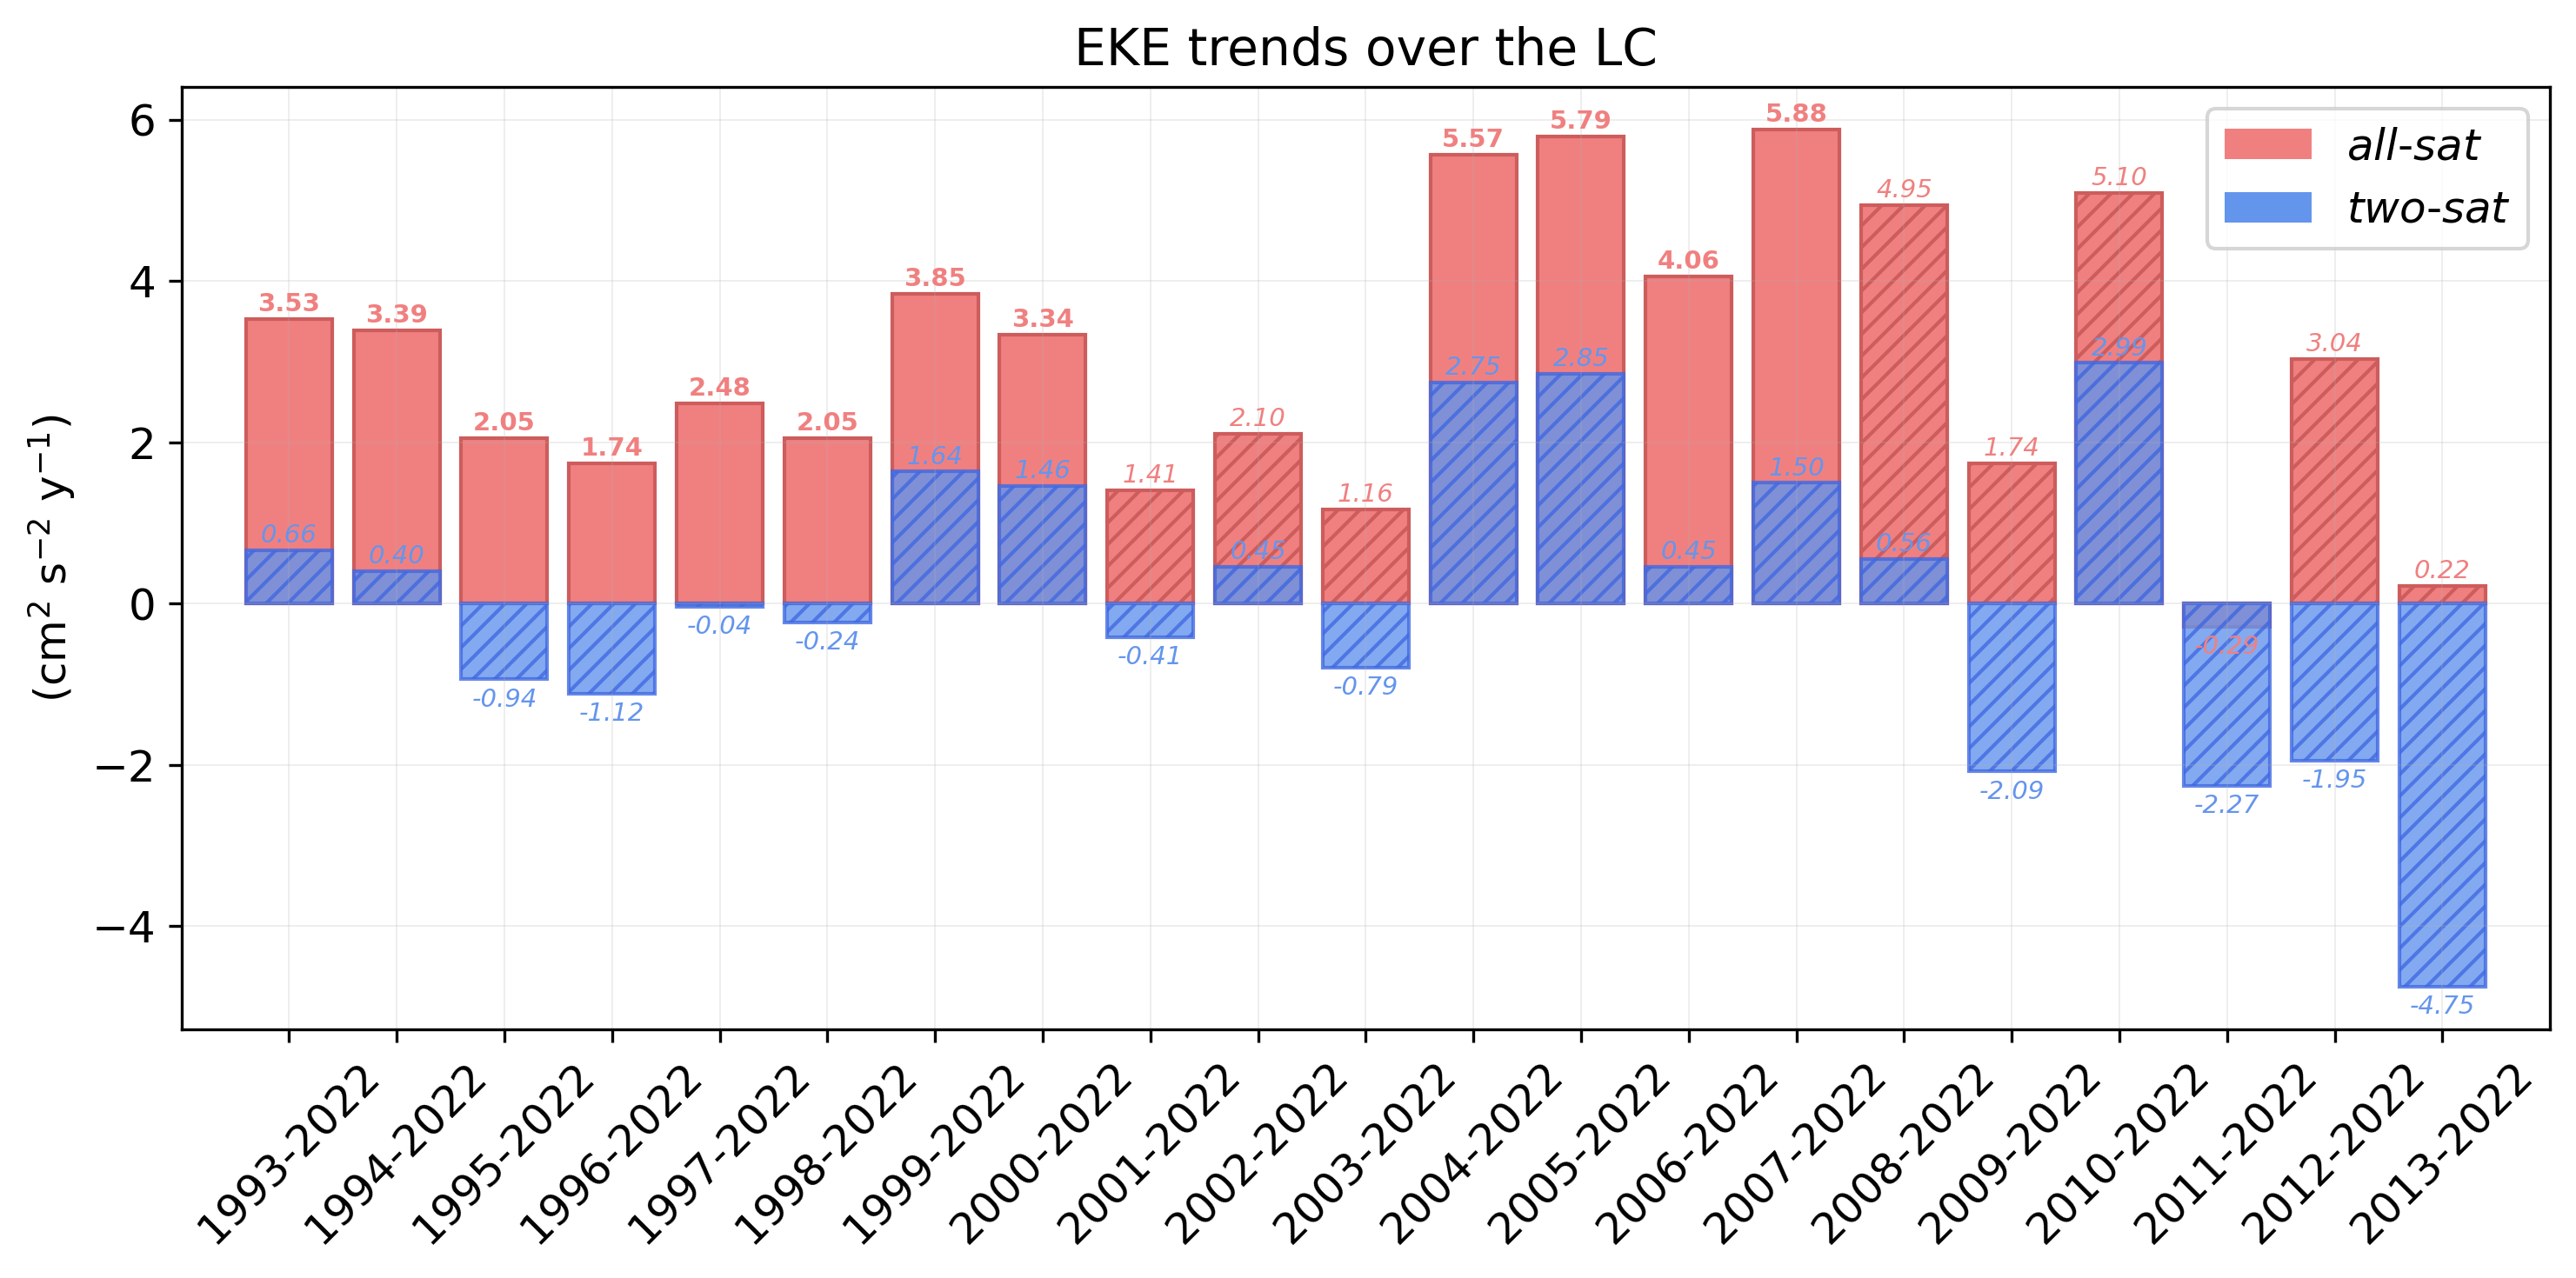

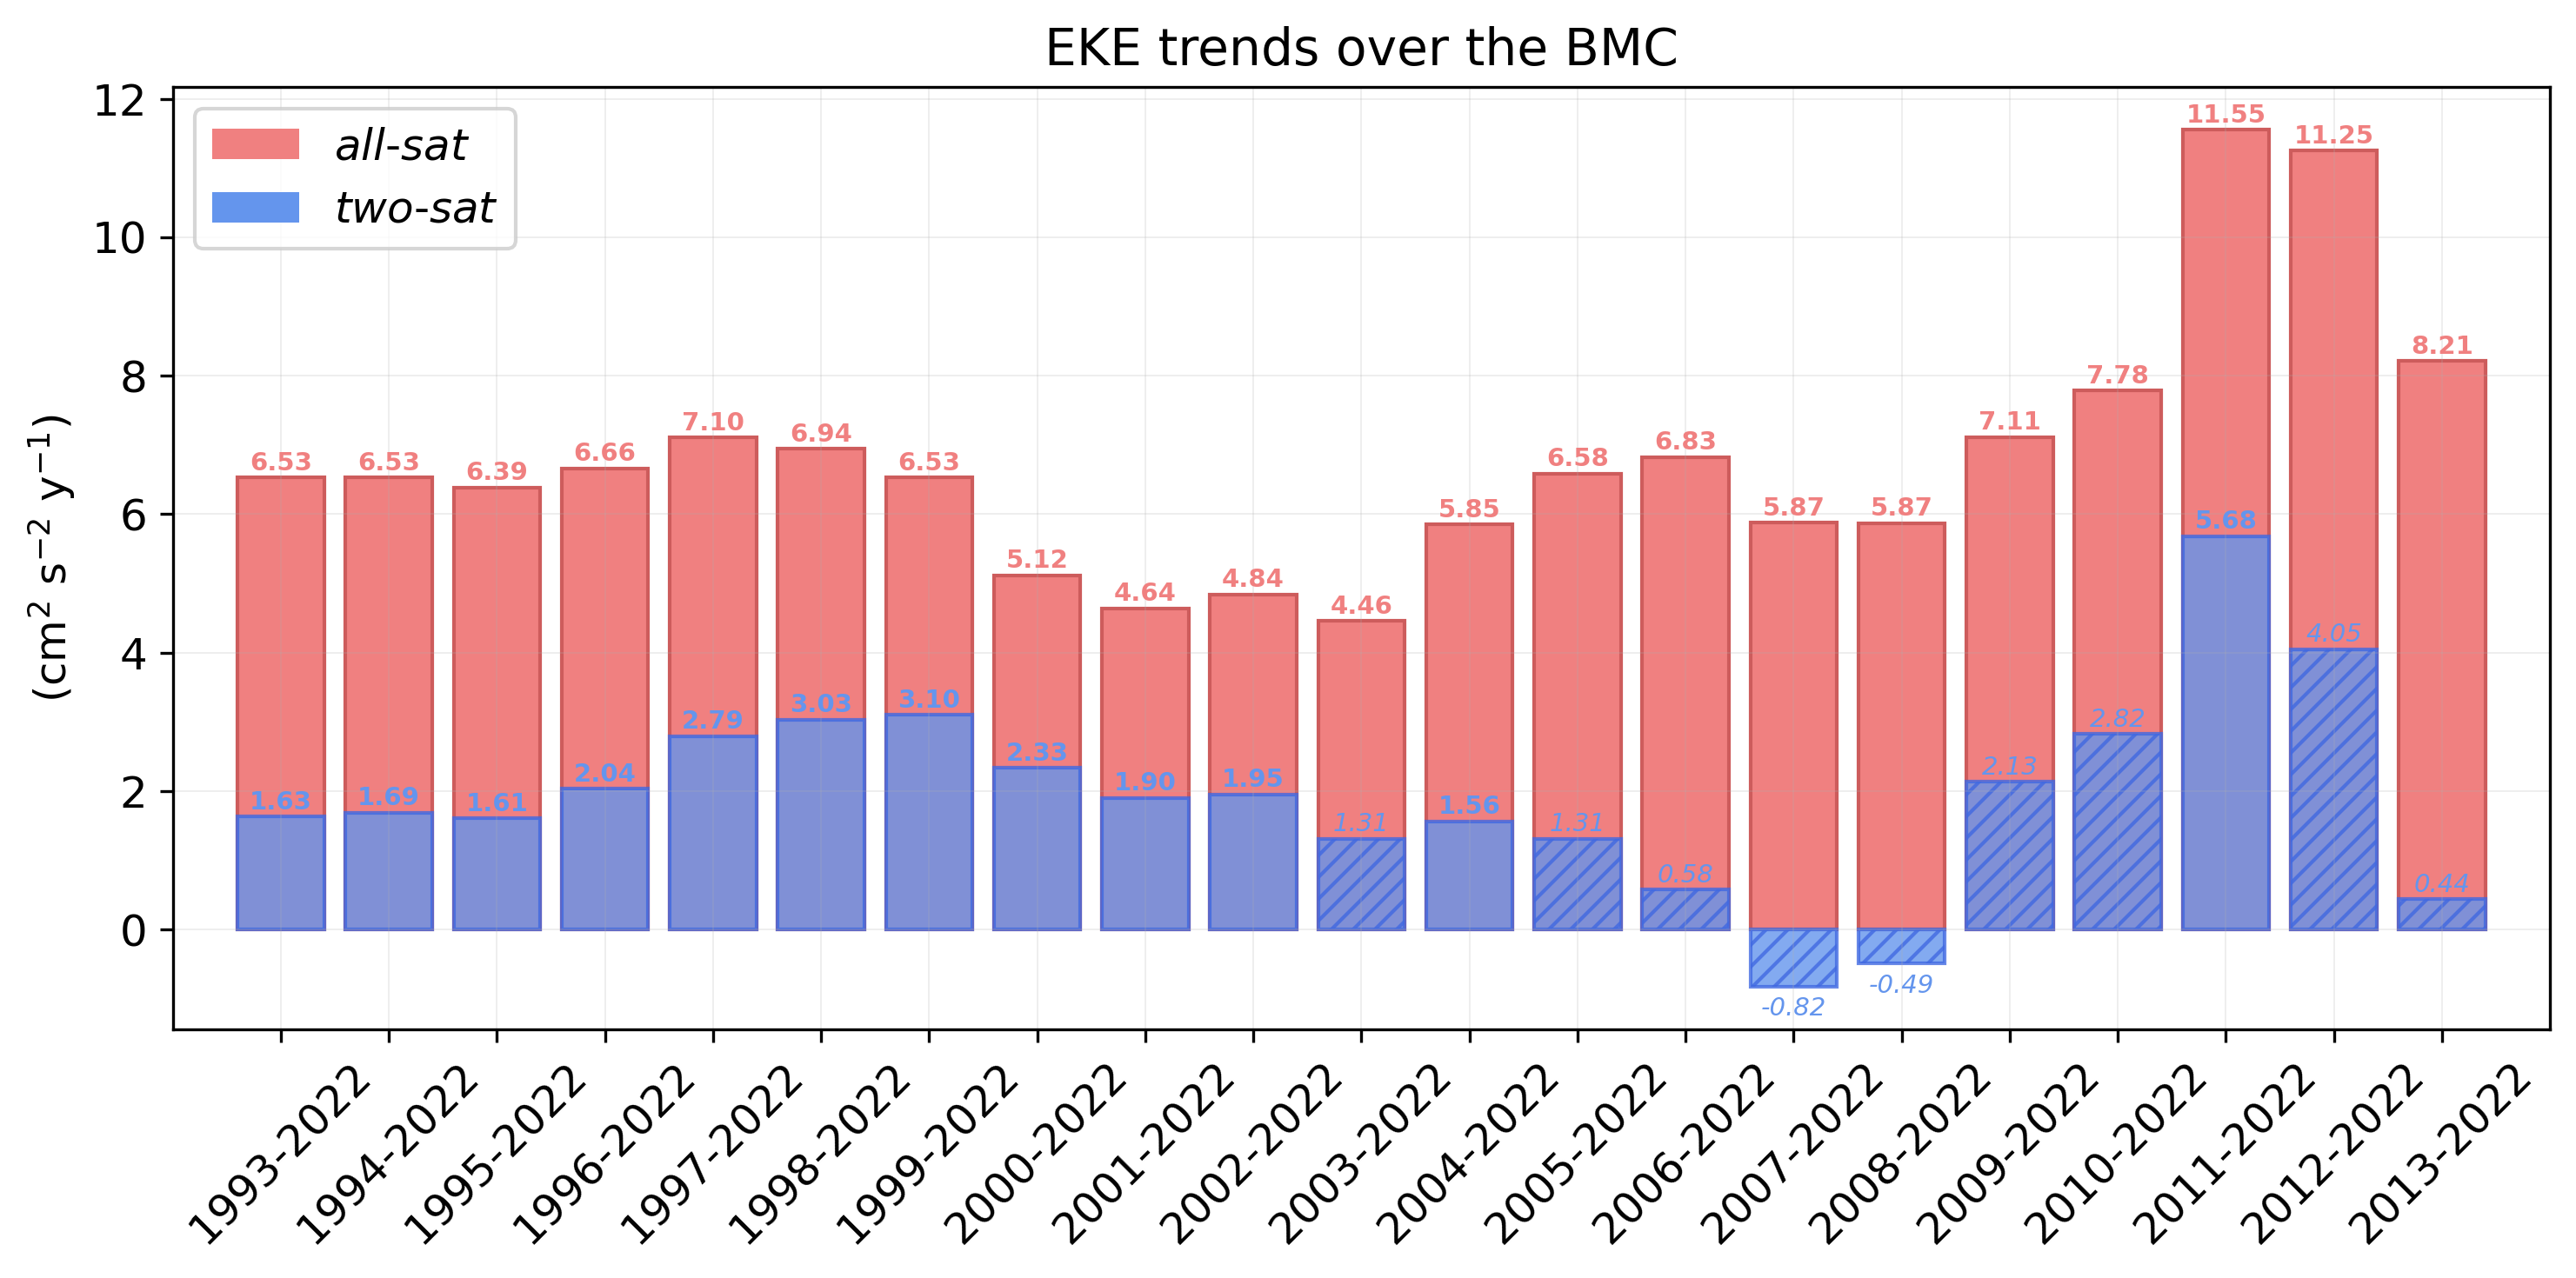

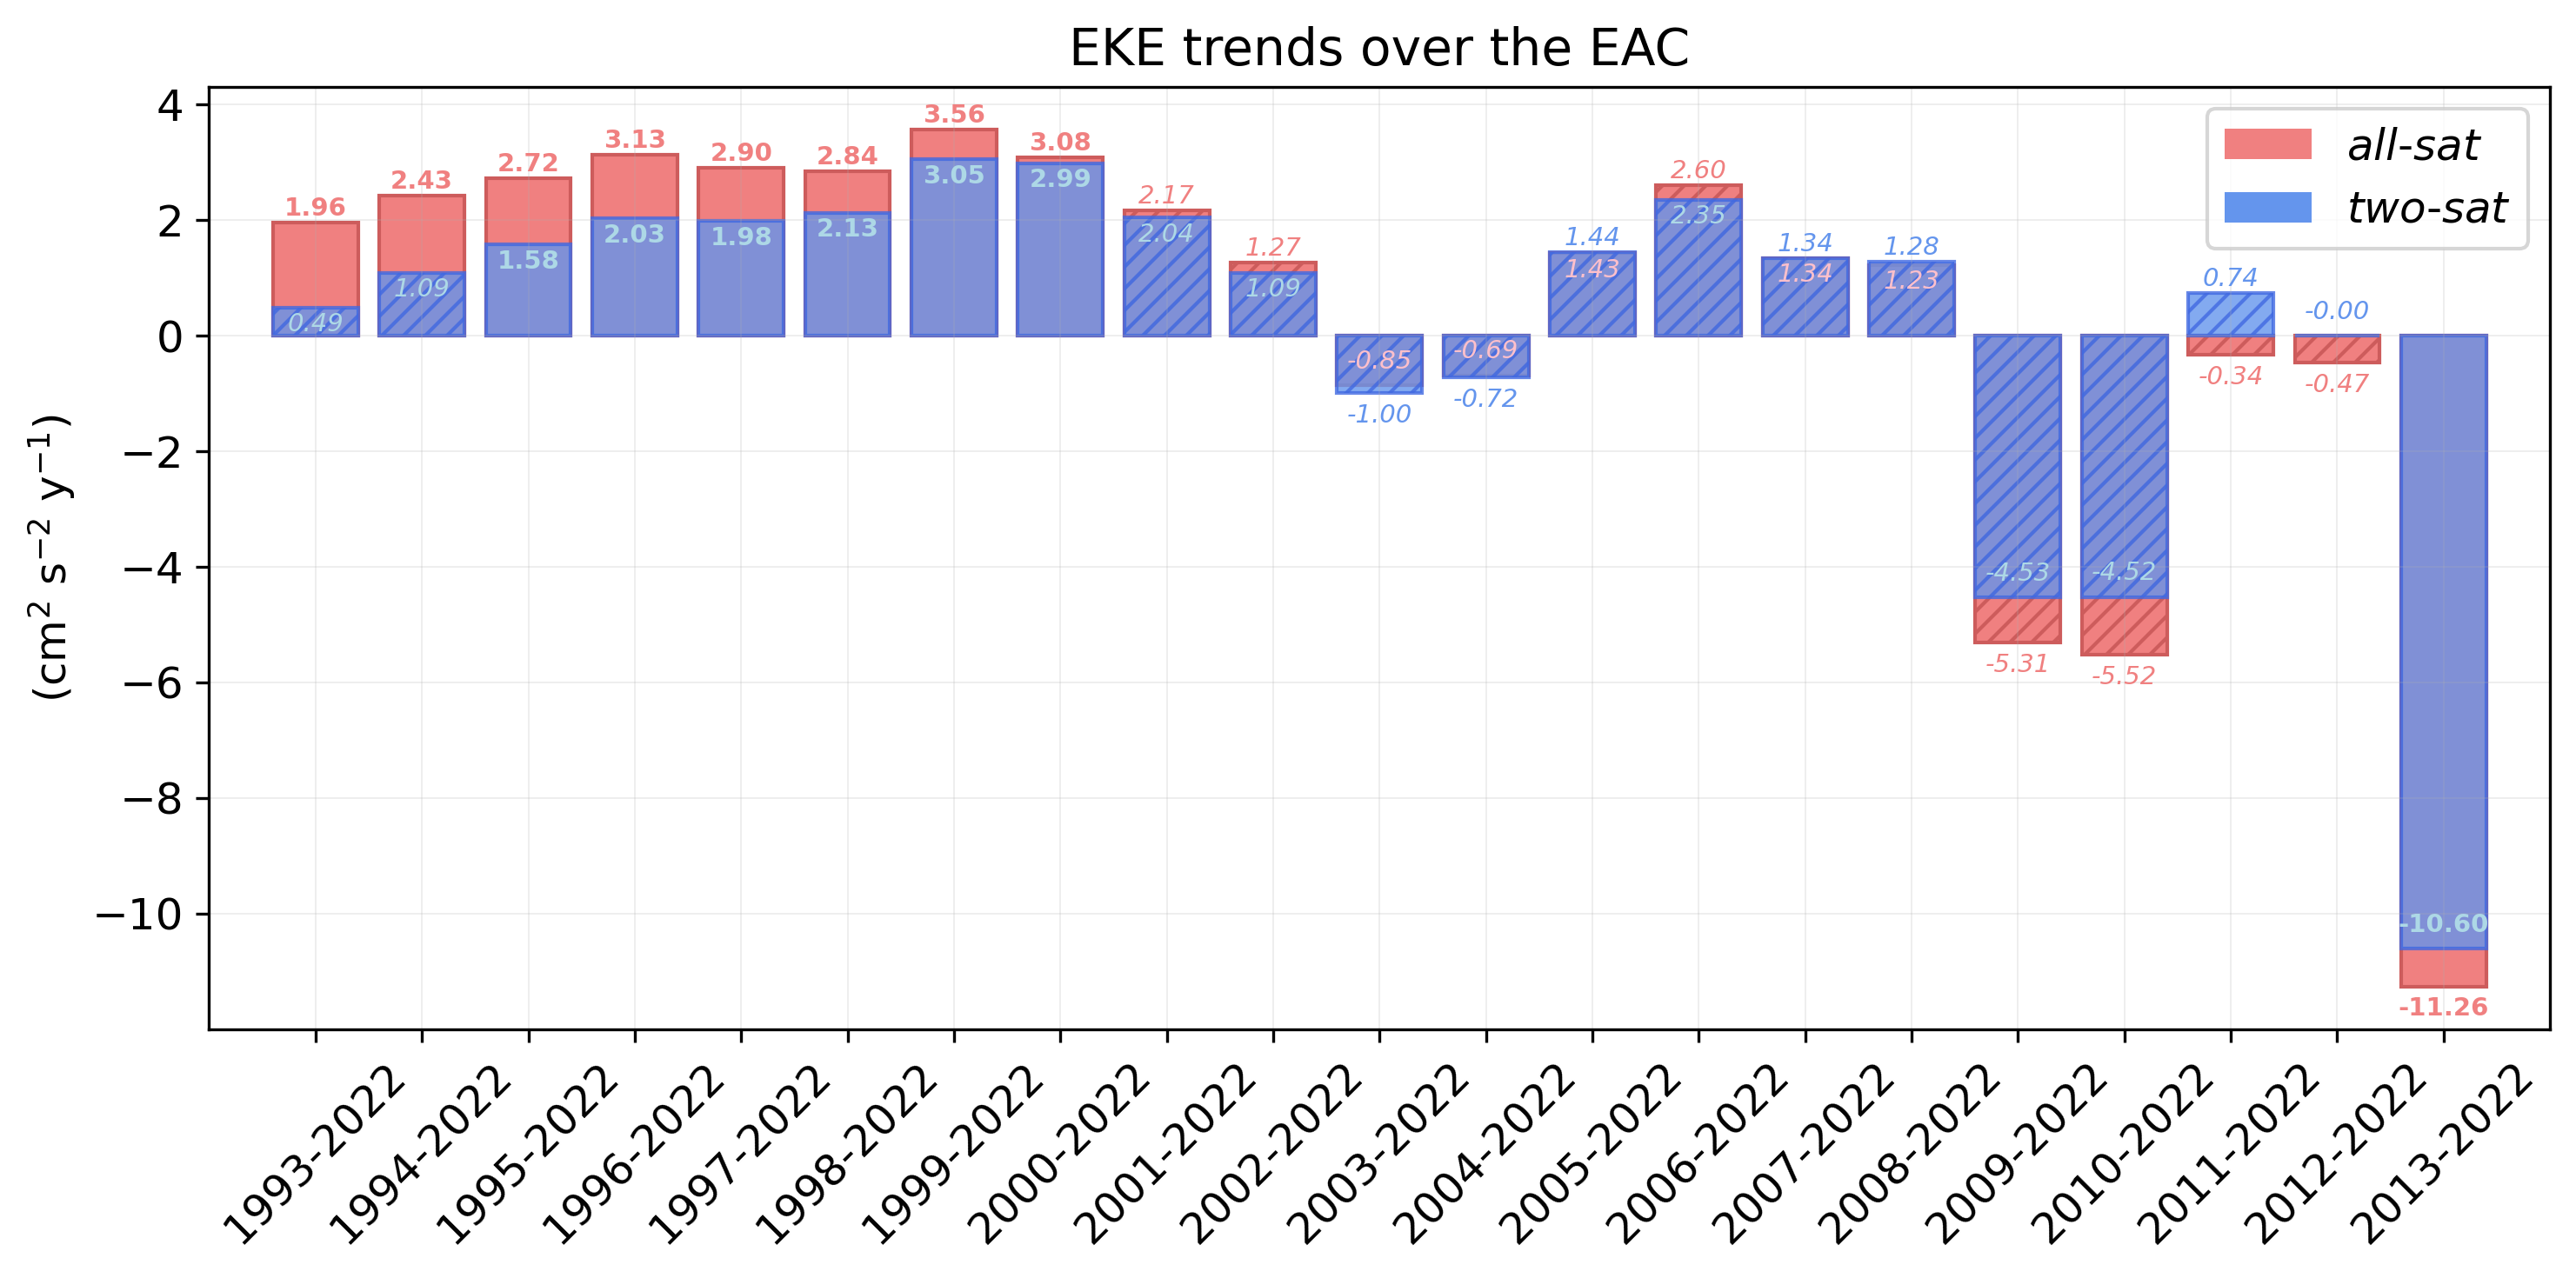

In [11]:
for region in dic_keys: 
    
 if region != 'KE':
    if region != 'GS':
      
      # markers for NON-SIGNIFICANT TRENDS
      threshold = 0.05  
    
      # marker for  non-significant trends
      mask_nonsig_all = [r'////' if x > threshold else None for x in dic_pval_all[region]]
      mask_nonsig_two = [r'////' if x > threshold else None for x in dic_pval_two[region]]

      # text style
      text_style_all = ['italic' if x > threshold else 'normal' for x in dic_pval_all[region]]
      text_style_two = ['italic' if x > threshold else 'normal' for x in dic_pval_two[region]]
      
    
      # FIGURE
    
      fig = plt.figure(figsize=(10,5), dpi=300)
      gs  = mpl.gridspec.GridSpec(1, 1, figure=fig)
      ax1 = fig.add_subplot(gs[0, 0])

      ax1.bar(test_years, dic_slope_all[region], width=wdth, align='center', 
          #alpha=0.5,
          color='lightcoral',  edgecolor='indianred' ,
          hatch = mask_nonsig_all, label = r'$\it{all}$-$\it{sat}$')
    
      ax1.bar(test_years, dic_slope_two[region], width=wdth, align='center', 
          alpha=0.8,
          color='cornflowerblue', edgecolor='royalblue', 
          hatch = mask_nonsig_two, label = r'$\it{two}$-$\it{sat}$')
    
      if region == 'EAC':
        
          add_text_bars_EAC(ax1, test_years, dic_slope_all[region], text_style_all, 'lightcoral', 
                                             dic_slope_two[region], text_style_two, 'cornflowerblue')
          
      else:     
          # add also trend with text - all-sat
          add_text_bars(ax1, test_years, dic_slope_all[region], text_style_all, 'lightcoral', 0.03, 7)
    
          # add also trend with text - two-sat
          add_text_bars(ax1, test_years, dic_slope_two[region], text_style_two, 'cornflowerblue', 0.03, 7)
        
   
      ax1.grid(which='major', linewidth=0.1) 
      ax1.set_title('EKE trends over the ' + region, fontsize = text_size+2)
      ax1.set_xticks(test_years[::1])
      ax1.set_xticklabels(['{}-2022'.format(year) for year in test_years[::1]]) 
      ax1.tick_params(axis='x', labelrotation=45)
      ax1.tick_params(axis='both', labelsize = text_size)
      ax1.set_ylabel("(cm$^2$ s$^{-2}$ y$^{-1}$)", fontsize = text_size)
      ax1.set_xlim(1992,2014)

    
      # Create legends for bar plot
      colors = ['lightcoral', 'cornflowerblue']
      categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

      legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
      ax1.legend(handles=legend_patches, loc='best',
                    fontsize=text_size)    
    
        
      plt.tight_layout()

      extension = 'png'
      savepath = '../../figures/Fig_S6_sensitivity_test_' + region + f'.{extension}' 

      dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
      if not os.path.exists(dir_path):
          os.makedirs(dir_path)

      plt.savefig(savepath, dpi=300, bbox_inches='tight')
    

## FIGURE 4: sensitivity test for the Kuroshio Extension and Gulf Stream

### Load masks

In [12]:
ds_allmasks = xr.open_dataset('../../results/masks.nc')
ds_maskso   = ds_allmasks.drop_vars(keys_excluded)

# mask is 1 or 0, only keep values = 1, NaN values = 0
ds_masks    = ds_maskso.where(ds_maskso != 0)

### For the maps:

I want to plot a color representative of the two-sat EKE trend. I want only the values corresponding to the following periods: 1993-2022 (30 years), 2003-2022 (20 years), 2013-2022 (10 years).

In [13]:
indices_periods = [0, 10, 20]

In [14]:
periods_maps = test_years[indices_periods]

In [15]:
list_trends_two_GS = [dic_slope_two['GS'][i] for i in indices_periods]
list_trends_two_KE = [dic_slope_two['KE'][i] for i in indices_periods]

In [16]:
text_size = 18

In [17]:
# Define the Gulf Stream region region
gulf_stream_extent = [-85, -35, 20, 55]  # [lon_min, lon_max, lat_min, lat_max]

# Define the Kuroshio Extension region
kuroshio_extent = [128, 178, 20, 55]  # [lon_min, lon_max, lat_min, lat_max]

### Figure 4

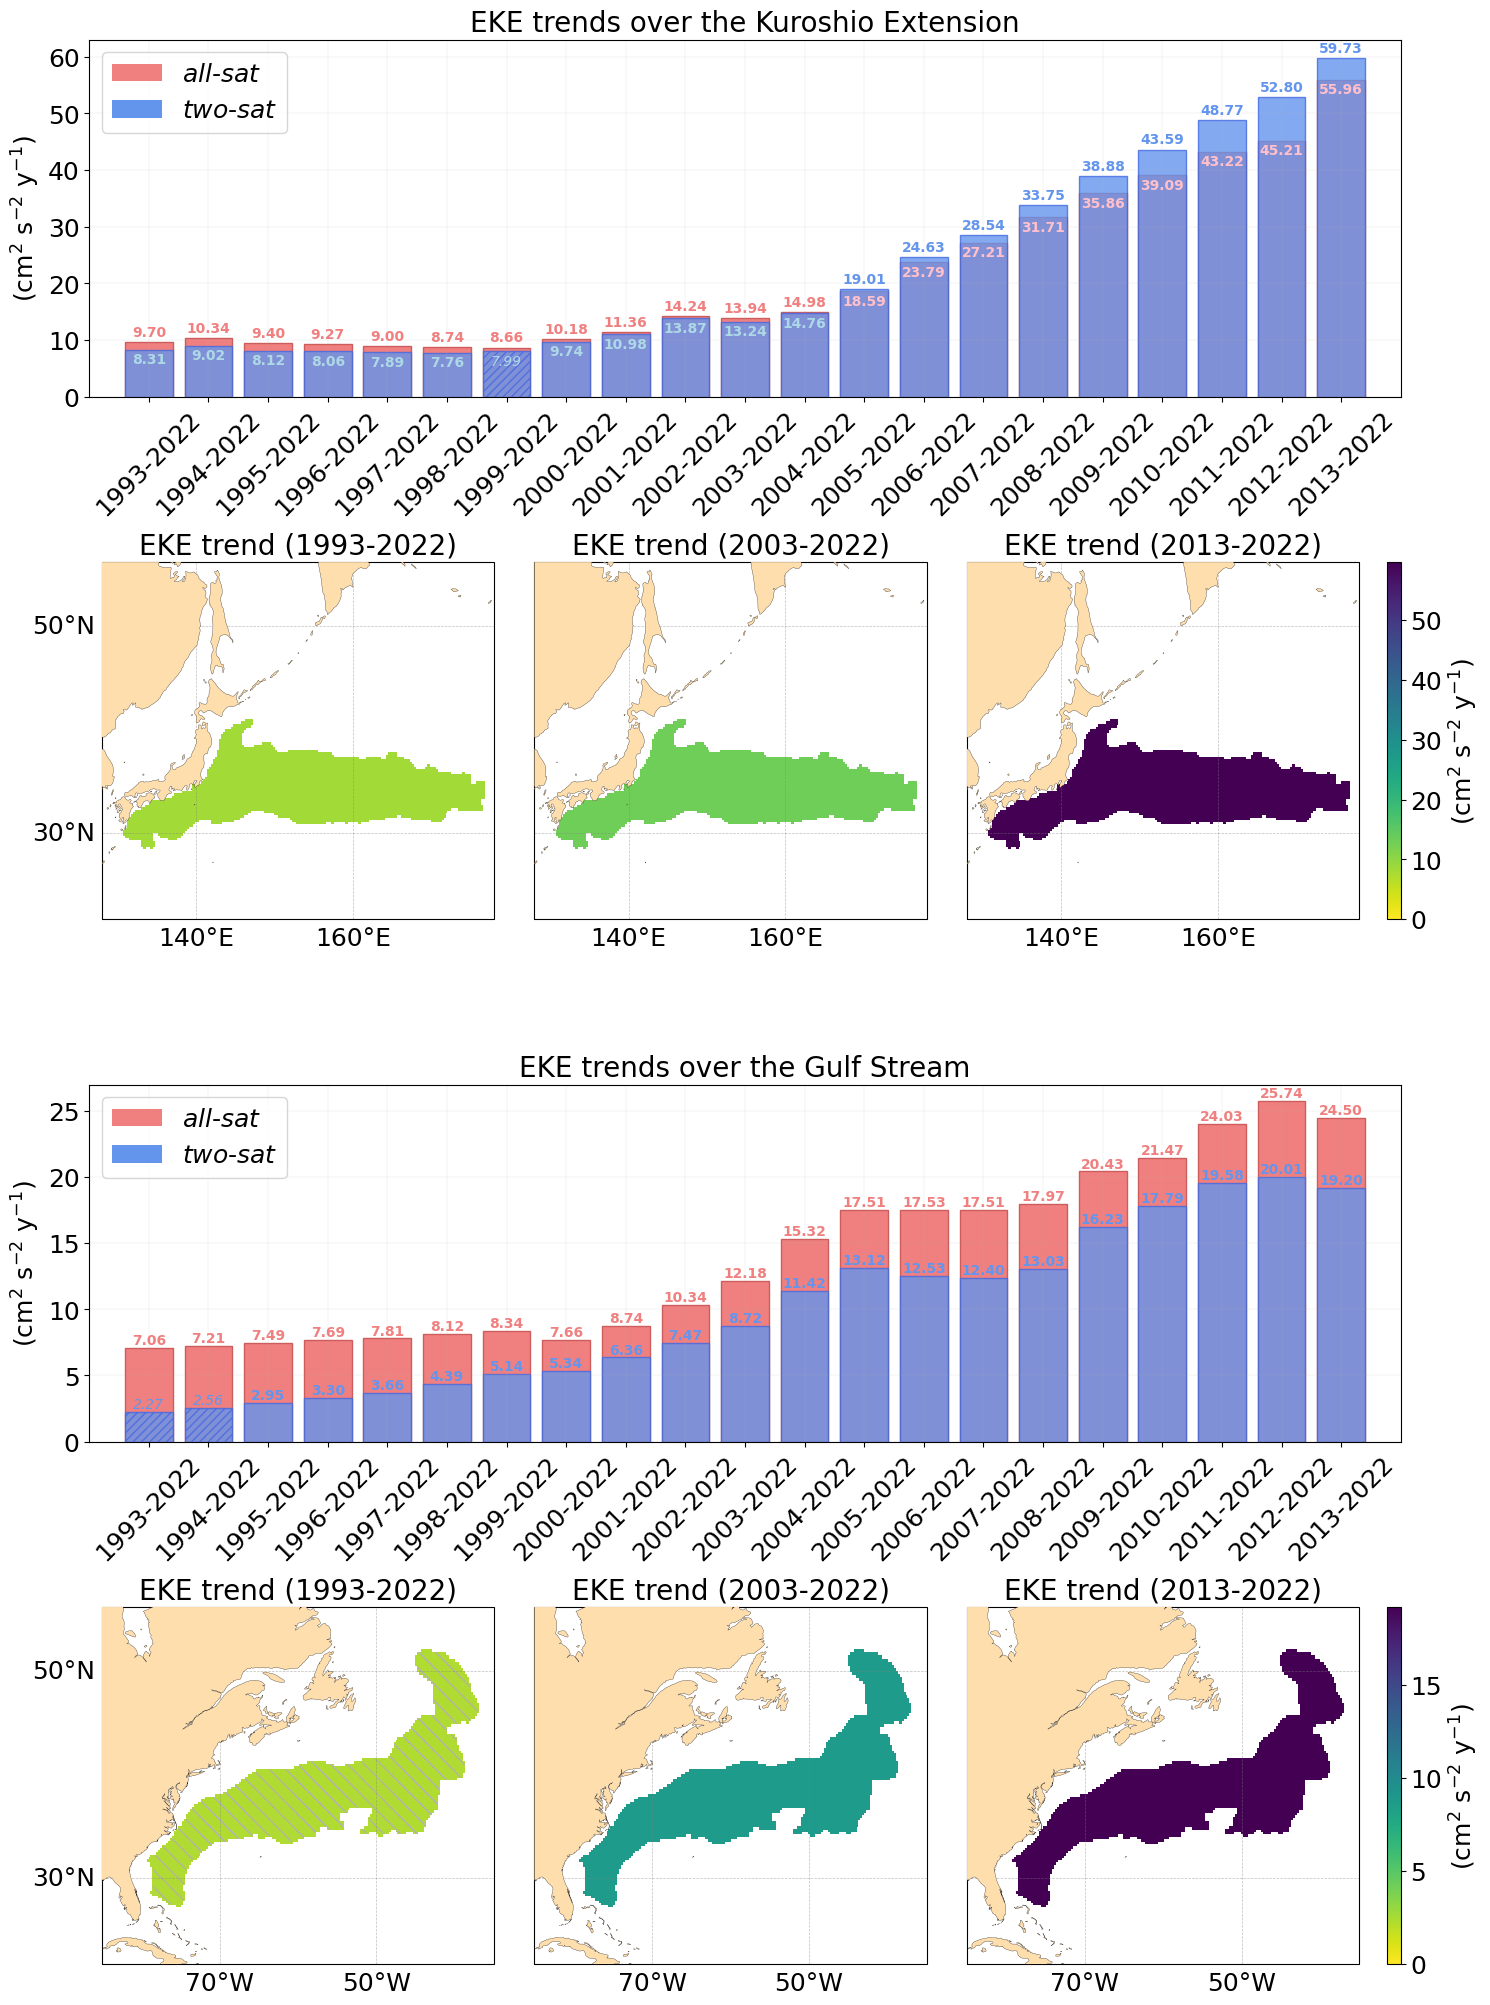

In [18]:
fig = plt.figure(figsize=(15, 20))  
gs = mpl.gridspec.GridSpec(4, 4, width_ratios=[30, 30, 30, 1],
                                 height_ratios=[20, 20, 20, 20], figure=fig)

''' SENSITIVITY TEST KE AND GS '''

for region in ['KE', 'GS']:
    
    # markers for NON-SIGNIFICANT TRENDS
    threshold = 0.05  
    
    # marker for  non-significant trends
    mask_nonsig_all = [r'////' if x > threshold else None for x in dic_pval_all[region]]
    mask_nonsig_two = [r'////' if x > threshold else None for x in dic_pval_two[region]]

    # text style
    text_style_all = ['italic' if x > threshold else 'normal' for x in dic_pval_all[region]]
    text_style_two = ['italic' if x > threshold else 'normal' for x in dic_pval_two[region]]

    if region == 'KE':
        ii = 0
    elif region == 'GS':
        ii = 2
        
    ax1 = fig.add_subplot(gs[ii, :])

    ax1.bar(test_years, dic_slope_all[region], width=wdth, align='center', 
        #alpha=0.5,
        color='lightcoral',  edgecolor='indianred' ,
        hatch = mask_nonsig_all, label = r'$\it{all}$-$\it{sat}$')
    
    ax1.bar(test_years, dic_slope_two[region], width=wdth, align='center', 
        alpha=0.8,
        color='cornflowerblue', edgecolor='royalblue', 
        hatch = mask_nonsig_two, label = r'$\it{two}$-$\it{sat}$')

    # add also trend with text - all-sat
    tsize = 10
    if region == 'KE':
        add_text_bars_KE(ax1, test_years, dic_slope_all[region], text_style_all, 'lightcoral', 
                                      dic_slope_two[region], text_style_two, 'cornflowerblue', tsize)

    else:
        add_text_bars(ax1, test_years, dic_slope_all[region], text_style_all, 'lightcoral', 0.04, tsize)
        add_text_bars(ax1, test_years, dic_slope_two[region], text_style_two, 'cornflowerblue', 0.04, tsize)
    
        
    ax1.grid(which='major', linewidth=0.1) 
    if region == 'KE':
        name_reg = 'Kuroshio Extension'
    elif region == 'GS':
        name_reg = 'Gulf Stream'
    ax1.set_title('EKE trends over the ' + name_reg, fontsize = text_size+2)
    ax1.set_xticks(test_years[::1])
    ax1.set_xticklabels(['{}-2022'.format(year) for year in test_years[::1]]) 
    ax1.tick_params(axis='x', labelrotation=45)
    ax1.tick_params(axis='both', labelsize = text_size)
    ax1.set_ylabel("(cm$^2$ s$^{-2}$ y$^{-1}$)", fontsize = text_size)
    ax1.set_xlim(1992,2014)
    if region == 'KE':
        ax1.set_ylim(0,63)
    elif region == 'GS':
        ax1.set_ylim(0,27)

    
    # Create legends for bar plot
    colors = ['lightcoral', 'cornflowerblue']
    categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

    legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
    ax1.legend(handles=legend_patches, loc='best',
                    fontsize=text_size)    
   


''' KUROSHIO EXTENSION MAPS'''

# Plot each map with a different color representing EKE values
for i in range(len(list_trends_two_KE)):
   
    ax = fig.add_subplot(gs[1, i], projection=ccrs.Mercator())  
    ax.set_extent(kuroshio_extent, crs=ccrs.PlateCarree())

    ax.add_feature(feature.LAND, zorder=100, facecolor='navajowhite', 
                   edgecolor='black', linewidth=0.2)

    pc = ax.pcolor(ds_masks['KE'].lon, ds_masks['KE'].lat, 
                   ds_masks['KE'] * list_trends_two_KE[i], 
                   transform=ccrs.PlateCarree(), 
                   cmap = plt.cm.viridis_r,  
                   vmin = 0, vmax= max(list_trends_two_KE))         
        
    ax.set_title(f'EKE trend ({periods_maps[i]}-2022)', fontsize = text_size+2)


    # Define the ticks you want to show
    xticks = [140, 160, 180]  # Longitude ticks
    yticks = [30, 50]         # Latitude ticks
    
    # Add longitude and latitude ticks
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                      color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mpl.ticker.FixedLocator(xticks)
    gl.ylocator = mpl.ticker.FixedLocator(yticks)
    gl.top_labels = False
    gl.right_labels = False
    if i!= 0: 
        gl.left_labels = False
    gl.xlabel_style = {'size': text_size}  # Set xlabel fontsize
    gl.ylabel_style = {'size': text_size}  # Set ylabel fontsize    
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


# Add a common colorbar
cax = fig.add_subplot(gs[1, -1])
cbar = plt.colorbar(pc, cax=cax, orientation='vertical', pad=0.05)
cbar.set_label(r'(cm$^2$ s$^{-2}$ y$^{-1}$)', fontsize = text_size)
# Set the size of colorbar ticks
cbar.ax.tick_params(labelsize=text_size)


''' GULF STREAM MAPS'''

# Plot each map with a different color representing EKE values
for i in range(len(list_trends_two_GS)):
   
    ax = fig.add_subplot(gs[3, i], projection=ccrs.Mercator()) 
    ax.set_extent(gulf_stream_extent, crs=ccrs.PlateCarree())

    ax.add_feature(feature.LAND, zorder=100, facecolor='navajowhite', 
                   edgecolor='black', linewidth=0.2)

    pc = ax.pcolor(ds_masks['GS'].lon, ds_masks['GS'].lat, 
                   ds_masks['GS'] * list_trends_two_GS[i], 
                   transform=ccrs.PlateCarree(), 
                   cmap = plt.cm.viridis_r, 
                   vmin = 0, vmax= max(list_trends_two_GS))     
    if i == 0:
        
        none_map = ListedColormap(['none'])
        ax.pcolor(ds_masks['GS'].lon, ds_masks['GS'].lat, 
                   ds_masks['GS'] * list_trends_two_GS[i], 
                   transform=ccrs.PlateCarree(), 
                   cmap=none_map,
                   hatch='\\ \\', edgecolor='0.7', lw=0.01) 

        
    ax.set_title(f'EKE trend ({periods_maps[i]}-2022)', fontsize = text_size+2)


    # Define the ticks you want to show
    xticks = [-70, -50, -30]  # Longitude ticks
    yticks = [30, 50]         # Latitude ticks
    
    # Add longitude and latitude ticks
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, 
                      color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mpl.ticker.FixedLocator(xticks)
    gl.ylocator = mpl.ticker.FixedLocator(yticks)
    gl.top_labels = False
    gl.right_labels = False
    if i!= 0: 
        gl.left_labels = False
    gl.xlabel_style = {'size': text_size}  # Set xlabel fontsize
    gl.ylabel_style = {'size': text_size}  # Set ylabel fontsize    
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER


# Add a common colorbar
cax = fig.add_subplot(gs[3, -1])
cbar = plt.colorbar(pc, cax=cax, orientation='vertical', pad=0.05)
cbar.set_label(r'(cm$^2$ s$^{-2}$ y$^{-1}$)', fontsize = text_size)
# Set the size of colorbar ticks
cbar.ax.tick_params(labelsize=text_size)

plt.tight_layout(h_pad=2.0)

extension = 'png'
savepath = '../../figures/Fig_4' + f'.{extension}' 

dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
if not os.path.exists(dir_path):
        os.makedirs(dir_path)

plt.savefig(savepath, dpi=300, bbox_inches='tight')